In [12]:
import pandas as pd
import numpy as np
import ast
import pickle
from pathlib import Path
import multirecording_spikeanalysis_edit as spike
import matplotlib.pyplot as plt

In [2]:
rce2_competitive_trial_timestamps = pickle.load(open('rce2_competitive_trial_timestamps.pkl', 'rb'))

In [3]:
event_keys = list(rce2_competitive_trial_timestamps['20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged'].keys())

In [4]:
event_keys

['win_competitive',
 'lose_no_comp',
 'lose_competitive',
 'win_no_comp',
 'alone_rewarded',
 'omission',
 'both_rewarded',
 'novel_lose_competitive',
 'novel_lose_no_comp',
 'novel_win_no_comp',
 'novel_win_competitive']

In [5]:
# Construct the path in a platform-independent way (HiPerGator or Windows)
ephys_path = Path('.') / 'export' / 'updated_phys' / 'non-novel' / 'omission'

ephys_data = spike.EphysRecordingCollection(str(ephys_path))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec
Please

In [6]:
rce2_comp_times2 = {}
delete_recordings = []

for key in rce2_competitive_trial_timestamps.keys():
    split_key = key.split('_subj_')
    subj = split_key[1][:3]
    subj_formatted = subj.replace('_', '-')
    updated_key = f"{split_key[0]}_subj_{subj_formatted}"
    rce2_comp_times2[updated_key] = rce2_competitive_trial_timestamps[key]
    
for recording in ephys_data.collection.keys():
    # Check if the recording key (without everything after subject #) is in timestamp_dicts
    start_pos = recording.find('subj_')
    # Add the length of 'subj_' and 3 additional characters to include after 'subj_'
    end_pos = start_pos + len('subj_') + 3
    # Slice the recording key to get everything up to and including the subject identifier plus three characters
    recording_key_without_suffix = recording[:end_pos]
    if recording_key_without_suffix in rce2_comp_times2:
        # Assign the corresponding timestamp_dicts dictionary to event_dict
        ephys_data.collection[recording].event_dict = rce2_comp_times2[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        subject = recording[start:start+3]
        
        # Assign the extracted subject
        ephys_data.collection[recording].subject = subject
        
        print(recording, ' event_dict and subject assigned')

    else:
        delete_recordings.append(recording)
        print(recording, ' not in source dict, will be deleted')

for recording in delete_recordings:
    del ephys_data.collection[recording]

del ephys_data.collection['20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec']

20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec  event_dict and subject assigned
20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec  event_dict and subject assigned
20230618_100636_standard_comp_to_omission_D2_subj_1-1_t1b2L_box2_merged.rec  event_dict and subject assigned
20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec  event_dict and subject assigned
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec  not in source dict, will be deleted
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec  event_dict and subject assigned
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec  event_dict and subject assigned
20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec  event_dict and subject assigned


In [7]:
spike_analysis = spike.SpikeAnalysis_MultiRecording(ephys_data, timebin = 100, smoothing_window=250, ignore_freq = 0.5)

All set to analyze


In [10]:
event_dfs = []
for event in event_keys:
#    if event != 'lose_competitive':
        df_name = event + '_df'
        df_name = spike_analysis.wilcox_baseline_v_event_collection(event, 10, 10, plot=False)
        event_dfs.append(df_name)
        print(event, ' completed')


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

win_competitive  completed


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

lose_no_comp  completed


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


lose_competitive  completed


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

win_no_comp  completed
alone_rewarded  completed


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal ap

omission  completed
both_rewarded  completed
novel_lose_competitive  completed
novel_lose_no_comp  completed
novel_win_no_comp  completed
novel_win_competitive  completed


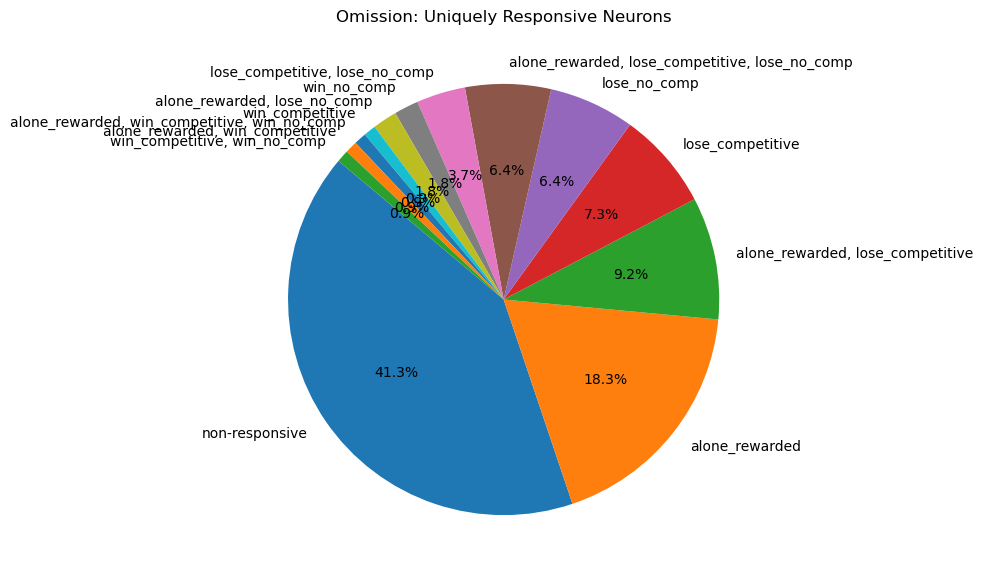

In [15]:
# Step 1: Concatenate the DataFrames
combined_df = pd.concat(event_dfs)

# Function to extract just the event name
def extract_event_name(event):
    # Splits the string and extracts the part before 'vs'
    return event.split(' vs ')[0].replace('10s ', '')

# Initialize an empty dictionary to hold aggregated data
aggregated_data = {}

# Iterate over the rows of the combined DataFrame
for index, row in combined_df.iterrows():
    # Extract event name
    event_name = extract_event_name(row['Event'])
    # Construct a unique key for each combination of recording, subject, and unit id
    key = (row['Recording'], row['Subject'], row['original unit id'])
    
    # Initialize the entry if not exists
    if key not in aggregated_data:
        aggregated_data[key] = {'sig_increase_events': set(), 'sig_decrease_events': set(), 'insig_events': set()}
    
    # Append the event name to the appropriate category based on 'event1 vs event2'
    if row['event1 vs event2'] == 'increases':
        aggregated_data[key]['sig_increase_events'].add(event_name)
    elif row['event1 vs event2'] == 'decreases':
        aggregated_data[key]['sig_decrease_events'].add(event_name)
    else:
        aggregated_data[key]['insig_events'].add(event_name)

# Convert the aggregated data into a DataFrame
rows = []
for (recording, subject, unit_id), categories in aggregated_data.items():
    row = {
        'Recording': recording,
        'Subject': subject,
        'original unit id': unit_id,
        'sig_increase_events': ', '.join(categories['sig_increase_events']),
        'sig_decrease_events': ', '.join(categories['sig_decrease_events']),
        'insig_events': ', '.join(categories['insig_events']),
    }
    rows.append(row)

aggregated_df = pd.DataFrame(rows)

aggregated_df['sig_events'] = aggregated_df.apply(lambda row: ', '.join(filter(None, [row['sig_increase_events'], row['sig_decrease_events']])), axis=1)

# Function to normalize event strings
def normalize_event_string(event_string):
    event_list = event_string.split(', ')
    event_list_sorted = sorted(event_list)  # Sort the list to ensure consistent order
    return ', '.join(event_list_sorted)  # Join the sorted list back into a string

# Apply the normalization function to the 'sig_events' column before counting
aggregated_df['sig_events'] = aggregated_df['sig_events'].apply(normalize_event_string)

# Count the unique combinations of significant events
sig_events_counts = aggregated_df['sig_events'].value_counts()

# Rename the empty strings to 'non-specific'
sig_events_counts = sig_events_counts.rename(index={'': 'non-responsive'})

# Group indexes containing ',' into 'multi-event specific'
# sig_events_counts['multi-event'] = sig_events_counts[[',' in index for index in sig_events_counts.index]].sum()
# sig_events_counts = sig_events_counts.drop(sig_events_counts[[',' in index for index in sig_events_counts.index]].index)

# Plot
plt.figure(figsize=(10, 7))
plt.pie(sig_events_counts, labels=sig_events_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Omission: Uniquely Responsive Neurons')
# plt.show()
plt.savefig('Omission_Wilcoxon_Pieplot_100msTimebin_comps.png', bbox_inches='tight')